# Estimate of the ID of KMNIST with the TWO-NN algorithm

We estimate the intrinsic dimensionality of a dataset similar to MNIST, but a 
bit more complex, in which the equivalent of the handwritten digits are Japanese Kanji.

In the original paper that described the TWO-NN method, the intrinsic dimension
of the submanifold corresponding to the "2" MNIST digit has been estimated ($\approx 13$).
It turns out, anyway, that mixtures of classes gives similar results.

Here, as an example, we will make an estimation of the ID of a mixture of Kanji and we will perform
also the block-analysis to verify if the estimate is reliable.

References:

- https://github.com/rois-codh/kmnist

- https://arxiv.org/abs/1812.01718)

- https://www.nature.com/articles/s41598-017-11873-y


![](./figs/kmnist.png)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import torch
from torchvision import datasets, transforms

In [9]:
seed = 1101
nsamples = 1000

In [10]:
torch.manual_seed(seed)
device = torch.device("cpu")

In [11]:
dataloader = torch.utils.data.DataLoader(
        datasets.KMNIST('../data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=nsamples, shuffle=True)

In [12]:
images,labels = next(iter(dataloader))

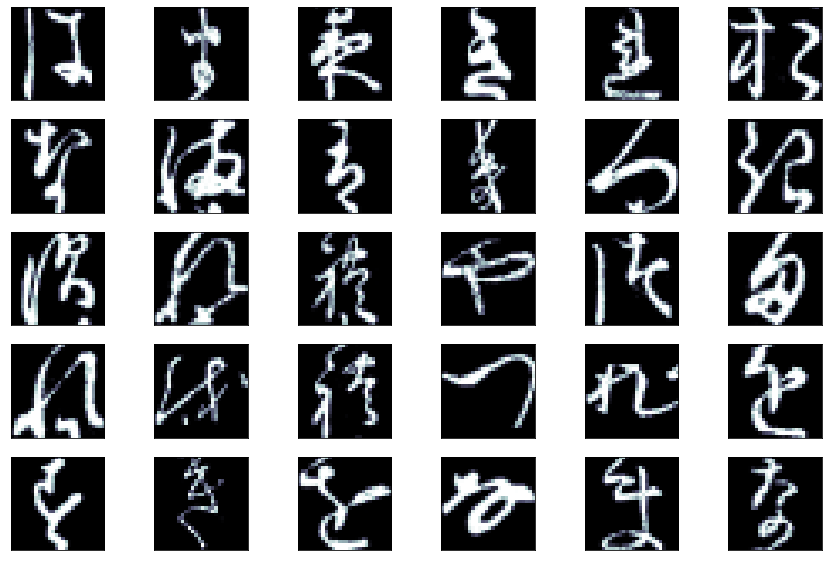

In [13]:
fig=plt.figure(figsize=(15,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(np.squeeze(images[i]),cmap='bone')
    plt.xticks([])
    plt.yticks([])

# Intrinsic dimension

This code will compute a point estimate of the ID with the TWO-NN algorithm.

In [14]:
from intrinsic_dimension import estimate,block_analysis
from scipy.spatial.distance import pdist,squareform

In [15]:
images = np.reshape(np.squeeze(images), (nsamples, -1) )

In [16]:
kmnist_estimate = estimate(squareform(pdist(images)), verbose=False)

In [17]:
print('Estimated ID : {}'.format( np.round(kmnist_estimate[2], 3) ) )

Estimated ID : 16.989


# Block analysis

This code will preform a block analysis similar to the one in the original article (e.g. in Figure 2).


In [18]:
kmnist_ba = block_analysis(squareform(pdist(images)))

In [20]:
kmnist_ba

(array([16.98911876, 17.95791314, 16.22571681, 17.91444254, 17.64451462,
        19.97659514, 18.27095468, 18.04888152, 18.96424686, 18.73696971,
        18.97533733, 19.39758789, 19.95152421, 20.08612792, 20.05376272,
        18.81759662, 19.59944535, 19.7523263 , 18.43658594, 19.71546139]),
 array([0.        , 0.43406943, 0.61684206, 1.75450601, 0.9851548 ,
        3.6847423 , 1.85874543, 2.60903261, 2.68230442, 2.08909868,
        3.15385845, 3.58649125, 3.71594766, 2.64902627, 1.48645261,
        3.15319501, 3.65088967, 4.8100991 , 3.02828591, 3.70426079]),
 [1000,
  500,
  333,
  250,
  200,
  166,
  142,
  125,
  111,
  100,
  90,
  83,
  76,
  71,
  66,
  62,
  58,
  55,
  52,
  50])

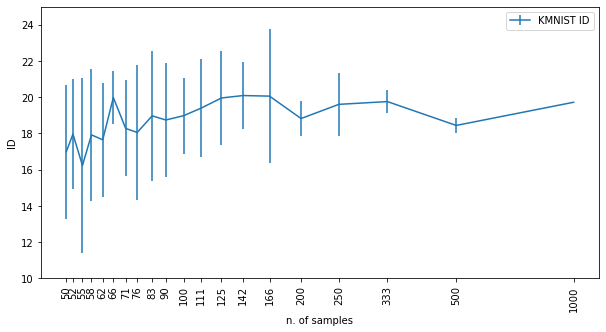

In [21]:
fig=plt.figure(figsize=(10,5))
plt.errorbar(np.log(kmnist_ba[2][::-1]),kmnist_ba[0],yerr=kmnist_ba[1][::-1], label='KMNIST ID')
plt.xticks(np.log(kmnist_ba[2][::-1]), kmnist_ba[2][::-1], rotation=90 )
plt.xlabel('n. of samples')
plt.ylabel('ID')
plt.ylim([10,25])
plt.legend()
plt.show()